<a href="https://colab.research.google.com/github/alifele/Sklearn/blob/master/Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests , io
import seaborn as sns; sns.set(font_scale = 1.2)

#importin data


In [0]:
url = 'https://raw.githubusercontent.com/adashofdata/muffin-cupcake/master/recipes_muffins_cupcakes.csv'

s = requests.get(url , stream = True).content
df = pd.read_csv(io.BytesIO(s))
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


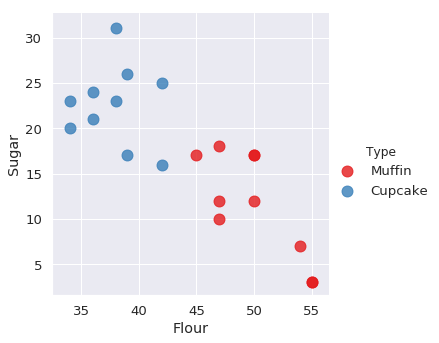

In [0]:
sns.lmplot('Flour', 'Sugar', data=df, hue="Type",fit_reg=False, palette='Set1',
           scatter_kws={'s':120})

#  Data preparation

In [0]:
ingredients = df[['Flour', 'Sugar']].as_matrix
Flour = np.array(df['Flour']).reshape(20,1)
Sugar = np.array(df['Sugar']).reshape(20,1)

ingredients = np.hstack((Flour,Sugar))
type_label = np.where(df['Type']=='Muffin',0,1)
recipe_features = list(df.columns[1:])
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

#Fitting The model

In [0]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
w = model.coef_   # it will give us the slope (or the weight) of each feature
b = model.intercept_  # it is the intercept of the fitting 
'''
our model is w[0]*Flour + w[1]*Sugar + intercept = hypothesi
in depend on the function SVC uses (i.e. sigmoid or arctan , ...) 
the out put will be sigmoid(hypothesis).
NOTE that the hypothesis is the decision boundary
'''
w = w[0] # note that w is a matrix with dimansion (1 , n_features)
print(b.shape)

(1,)


# Ploting the regression line

[30, 60, 0, 30]

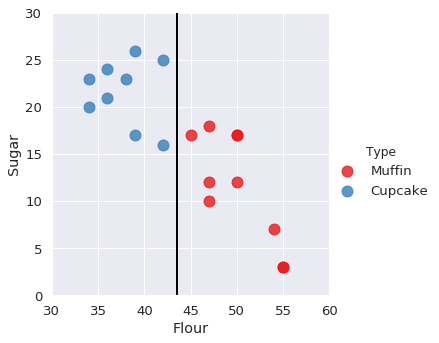

In [0]:
sns.lmplot('Flour', 'Sugar', data=df, hue="Type",fit_reg=False, palette='Set1',
           scatter_kws={'s':120})
x = np.linspace(30,60)
y = -w[0]/w[1] * x - b/w[1]

plt.plot(x,y,linewidth=2,color='black')
plt.axis([30,60,0,30])

#Plotting the hyperlines

[[45. 17.]
 [42. 16.]
 [42. 25.]]


[30, 60, 0, 30]

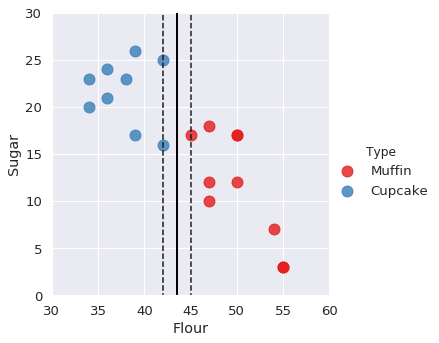

In [0]:
a = model.support_vectors_
print(a) #note that a is a 3*1 matrix.
# The information of the upper support vector is in a[0]
# And the information of the lower support vector is in a[-1]
'''
the relation of the decision boundary of support vectors is
w[1]*Sugar + W[0]*Flour - (a[1]*w[1] + a[0]*w[0])
'''
sns.lmplot('Flour', 'Sugar', data=df, hue="Type",fit_reg=False, palette='Set1',
           scatter_kws={'s':120})
x = np.linspace(30,60)
y = -w[0]/w[1] * x - b/w[1]
plt.plot(x,y,linewidth=2,color='black')

upper_a = a[0]
upper_support = -w[0]/w[1] *x +(upper_a[1]*w[1] + upper_a[0]*w[0])/w[1]
plt.plot(x,upper_support,'k--')
plt.axis([30,60,0,30])

lower_a = a[-1]
lower_support = -w[0]/w[1] *x +(lower_a[1]*w[1] + lower_a[0]*w[0])/w[1]
plt.plot(x,lower_support,'k--')
plt.axis([30,60,0,30])

#Predicting new cases



In [0]:
def muffin_or_cupcake(Flour,Sugar):
  if(model.predict([[Flour,Sugar]]) ==0 ):
    print('You\'re looking at a muffin recipe!')
  else:
    print('You\'re looking at a cupcake recipe!')

In [0]:
muffin_or_cupcake(50,20)

You're looking at a muffin reeipe!


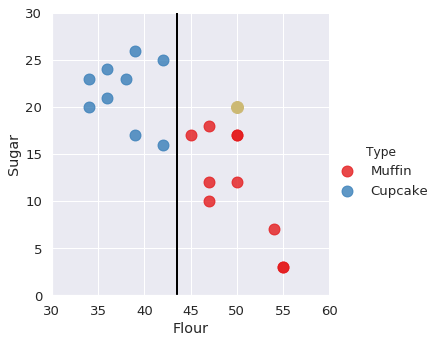

In [0]:
sns.lmplot('Flour', 'Sugar', data=df, hue="Type",fit_reg=False, palette='Set1',
           scatter_kws={'s':120})
plt.plot(x,y,linewidth=2,color='black')
plt.axis([30,60,0,30])
plt.plot(50,20,'yo',markersize=12)